<a href="https://colab.research.google.com/github/nithyasri0913/Algorithmic-Trading/blob/main/algorithmic_trading_dual_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dual Moving Average Crossover Strategy for alogrithmic trading to determine when to buy and sell a stock

###A buy signal is generated when a short-term average crosses a long-term average and rises above it

### A sell signal is generated when a short-term average crosses a long-term average and falls below it

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving AAPL.csv to AAPL (1).csv


In [ ]:
AAPL=pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-27,24.285357,24.316786,24.055000,24.131430,20.692656,427008400
1,2012-08-28,24.106428,24.146429,23.952499,24.100000,20.665697,267416800
2,2012-08-29,24.116072,24.202499,24.021429,24.052500,20.624968,202806800
3,2012-08-30,23.951429,23.983929,23.673214,23.709642,20.330969,302699600
4,2012-08-31,23.830357,23.878571,23.473213,23.758572,20.372923,338321200
...,...,...,...,...,...,...,...
2511,2022-08-19,173.029999,173.740005,171.309998,171.520004,171.520004,70211500
2512,2022-08-22,169.690002,169.860001,167.139999,167.570007,167.570007,69026800
2513,2022-08-23,167.080002,168.710007,166.649994,167.229996,167.229996,54147100
2514,2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500


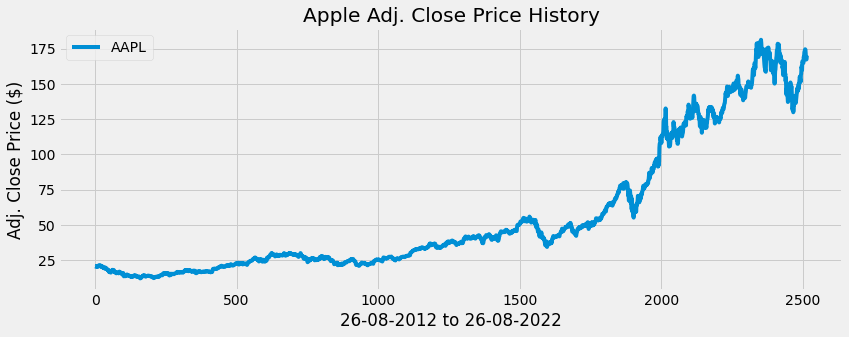

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'],label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('26-08-2012 to 26-08-2022')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#simple moving average with a 30 day window
SMA30=pd.DataFrame()
SMA30['Adj Close']=AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,159.913855
2512,160.677221
2513,161.396299
2514,162.137692


In [ ]:
#simple moving average with a 100 day window
SMA100=pd.DataFrame()
SMA100['Adj Close']=AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,154.134258
2512,154.025462
2513,153.925132
2514,153.859313


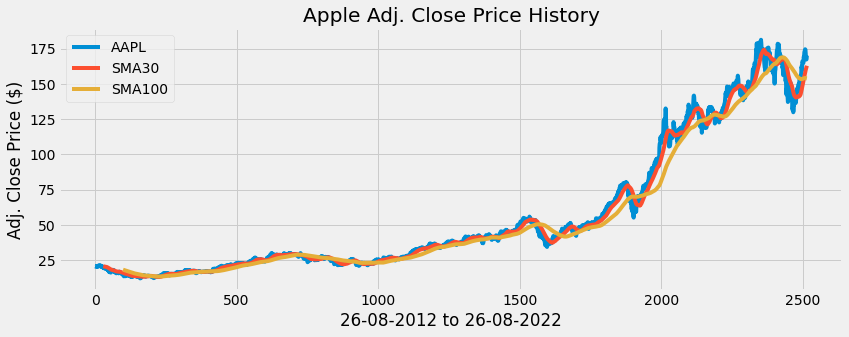

In [ ]:
#Visualise the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'],label='AAPL')
plt.plot(SMA30['Adj Close'],label='SMA30')
plt.plot(SMA100['Adj Close'],label='SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('26-08-2012 to 26-08-2022')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#new data frame to store all data
data=pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA100']=SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,20.692656,NaN,NaN
1,20.665697,NaN,NaN
2,20.624968,NaN,NaN
3,20.330969,NaN,NaN
4,20.372923,NaN,NaN
...,...,...,...
2511,171.520004,159.913855,154.134258
2512,167.570007,160.677221,154.025462
2513,167.229996,161.396299,153.925132
2514,167.529999,162.137692,153.859313


In [ ]:
#function to signal when to buy and sell stock

def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag!=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    elif data['SMA30'][i] < data['SMA100'][i]:
        if flag!=0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['AAPL'][i])
          flag=0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy,sigPriceSell)
    

In [ ]:
#Store the buy and sell data into a variable
buy_sell=buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,20.692656,NaN,NaN,NaN,NaN
1,20.665697,NaN,NaN,NaN,NaN
2,20.624968,NaN,NaN,NaN,NaN
3,20.330969,NaN,NaN,NaN,NaN
4,20.372923,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2511,171.520004,159.913855,154.134258,NaN,NaN
2512,167.570007,160.677221,154.025462,NaN,NaN
2513,167.229996,161.396299,153.925132,NaN,NaN
2514,167.529999,162.137692,153.859313,NaN,NaN


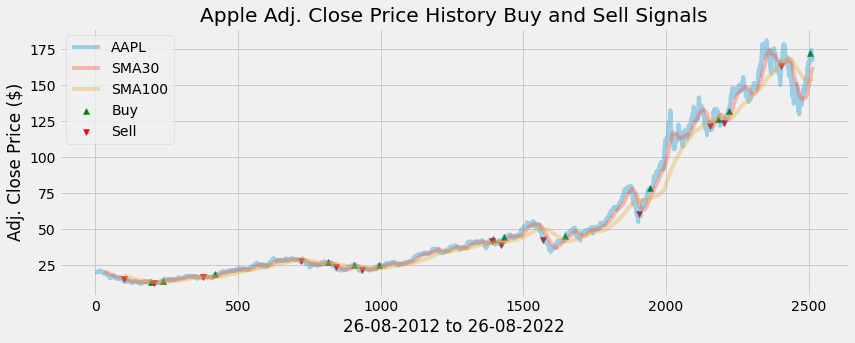

In [ ]:
#Visualize the data and the strategy to buy and sell stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'],label='AAPL', alpha=0.35)
plt.plot(data['SMA30'],label='SMA30',alpha=0.35)
plt.plot(data['SMA100'],label='SMA100',alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index, data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel('26-08-2012 to 26-08-2022')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()